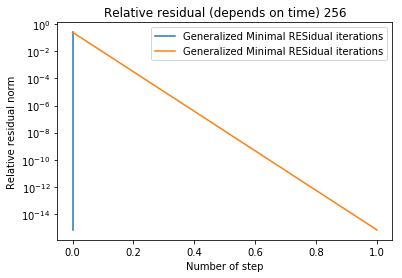

In [18]:
import numpy as np
import time
import scipy
import scipy.sparse.linalg as spla
import inspect
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

max_iter = 1000
C=np.empty(max_iter)
def report(xk):
    global i
    global C
    frame = inspect.currentframe().f_back
    C[i] = frame.f_locals['resid']
    i+=1


def my_gmres(A, b, x0, maxiter, tol):
    global i
    global toler
    global C
    gmres = []
    A = np.asarray(A) 
    if np.all(A == np.eye(A.shape[0], A.shape[1])):
        return b
    if np.all(A == np.diag(np.diagonal(A))):
        return b/np.diagonal(M)
    t = time.time()
    U_gm =  spla.gmres(A, b,  x0=x0, maxiter = maxiter, tol = tol, callback = report)[0]   
    t = time.time() - t
    plt.semilogy(np.arange(i)*1/i*t,C[:i]/np.linalg.norm(b), label="Generalized Minimal RESidual iterations")
    return C[:i]
    
i = 0
A = np.asarray([[0, 1], [2, 3]])
b = np.asarray([1, 2])
x0 = np.asarray([2, 3])
gmres = my_gmres(A, b, x0, maxiter=max_iter, tol=6e-10)

plt.semilogy(np.arange(gmres.shape[0]),gmres/np.linalg.norm(b), label="Generalized Minimal RESidual iterations")

plt.legend()
plt.title('Relative residual (depends on time) %i' % 256)
plt.xlabel('Number of step')
plt.ylabel('Relative residual norm')
plt.show()

i=0
toler = 1e-6